In [1]:
from sec_api import ExecCompApi
import config

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
execCompApi = ExecCompApi(config.sec_api_key)

In [56]:
result_ticker = execCompApi.get_data('JNJ')

In [57]:
starter_df = pd.DataFrame(result_ticker)

In [58]:
ceo_title_list = ['CHIEF EXECUTIVE','CEO']
cfo_title_list = ['CHIEF FINANC','CFO']
interim_title_list = ['INTERIM','ACTING']

ceo_regstr = '|'.join(ceo_title_list)
cfo_regstr = '|'.join(cfo_title_list)
interim_regstr = '|'.join(interim_title_list)

# https://stackoverflow.com/questions/49508281/check-if-multiple-substrings-are-in-pandas-dataframe
starter_df['CEO'] = starter_df['position'].str.upper().str.contains(ceo_regstr)
starter_df['CFO'] = starter_df['position'].str.upper().str.contains(cfo_regstr)
starter_df['Interim'] = starter_df['position'].str.upper().str.contains(interim_regstr)

<AxesSubplot:xlabel='year', ylabel='salary'>

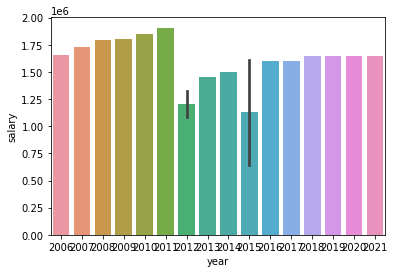

In [59]:
sns.barplot(data=starter_df[starter_df['CEO']==True],x='year',y='salary',)

In [60]:
#https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots
df = pd.melt(starter_df[starter_df['CEO']==True][['year','salary','nonEquityIncentiveCompensation','stockAwards','total']],
             id_vars='year', var_name='component', value_name="amount")

<AxesSubplot:xlabel='year', ylabel='amount'>

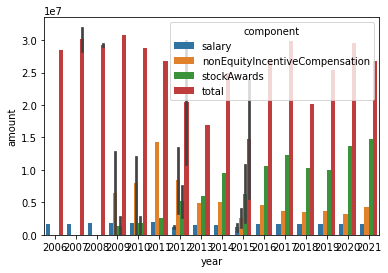

In [64]:
sns.barplot(data=df,x='year',y='amount',hue='component')